In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Step 1: Create a synthetic dataset
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Step 2: Initialize and train your neural network
# Multi-Layer Perceptron (MLP) 
model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=10000, random_state=42)
model.fit(X_train, y_train);

**Architecture:**

    - Input Layer: 2 neurons (for 2 input features).
    - Hidden Layer 1: 10 neurons (ReLU activation).
    - Output Layer: 1 neuron (Sigmoid activation for binary classification).

### Output Layer Activation in `MLPClassifier`

It is impossible to change it directly.

- **Binary Classification (2 classes):**
  - The output layer uses the **logistic sigmoid activation function** (`logistic`).

- **Multiclass Classification (> 2 classes):**
  - The output layer uses the **softmax activation function**.

- **Regression Tasks:**
  - The output layer uses the **identity activation function** (i.e., no activation), providing a raw numerical output.


### MLPClassifier Key Parameters

Multi-Layer Perceptron (MLP) is a fully connected neural network (also known as a dense network).

- **hidden_layer_sizes**: Defines the number of neurons in each hidden layer.
  - `(100,)` → One hidden layer with 100 neurons.
  - `(50, 30)` → Two hidden layers with 50 and 30 neurons respectively.

- **activation**: Activation function for the hidden layers.
  - `'relu'` (default): Rectified Linear Unit function.
  - `'logistic'`: Sigmoid function.
  - `'tanh'`: Hyperbolic tangent function.
  - `'identity'`: No activation (linear function).

- **solver**: The optimization algorithm to minimize the loss.
  - `'adam'` (default): Stochastic gradient-based optimizer.
  - `'lbfgs'`: Quasi-Newton method (faster for small datasets).
  - `'sgd'`: Stochastic Gradient Descent (may require tuning learning rate).

- **alpha**: Regularization parameter (L2 penalty).
  - Default is `0.0001`. Higher values add more regularization.

- **learning_rate**: Controls the step size during optimization.
  - `'constant'` (default): Fixed learning rate.
  - `'invscaling'`: Decreases over iterations.
  - `'adaptive'`: Adjusts based on performance.


In [4]:
# Step 3: Make predictions
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0], d

In [5]:
# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

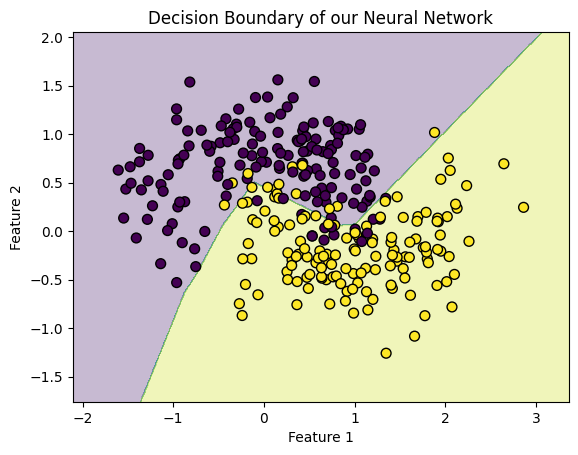

(0.91,
 '              precision    recall  f1-score   support\n\n           0       0.92      0.90      0.91       156\n           1       0.90      0.92      0.91       144\n\n    accuracy                           0.91       300\n   macro avg       0.91      0.91      0.91       300\nweighted avg       0.91      0.91      0.91       300\n')

In [6]:
# Step 5: Visualize decision boundaries
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of our Neural Network')
    plt.show()

# Display results
plot_decision_boundary(X_test, y_test, model)

# Show accuracy and classification report
accuracy, report


## MNIST Example

In [7]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

In [8]:
# Step 1: Load the MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)  # Convert target to integer type

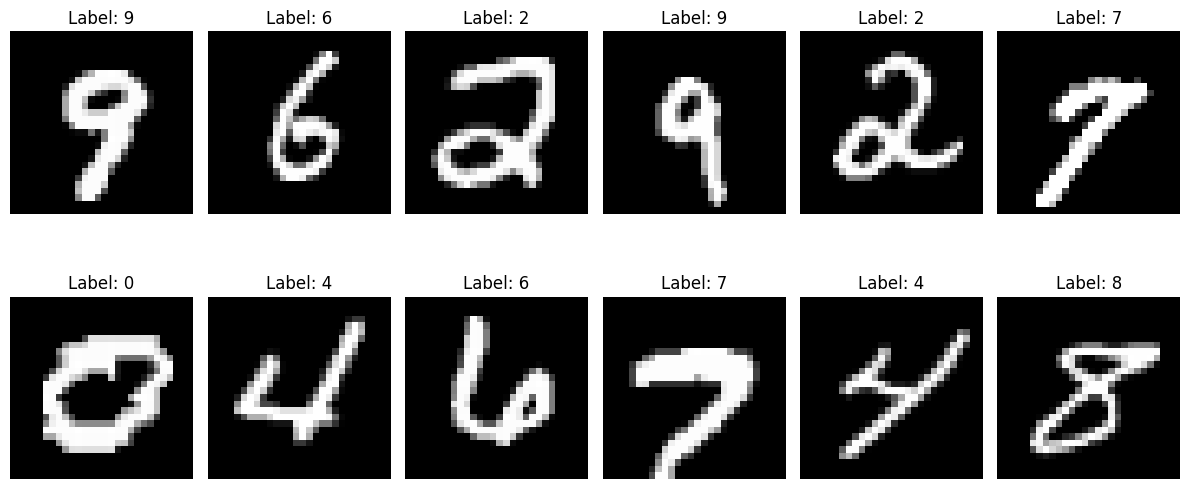

In [9]:
# Function to display a grid of sample images from the dataset
def display_samples(X, y, samples=12):
    plt.figure(figsize=(12, 6))
    for i in range(samples):
        # Randomly select an index
        index = np.random.randint(0, X.shape[0])
        image = X[index].reshape(28, 28)
        label = y[index]

        plt.subplot(2, 6, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')

    plt.tight_layout()

# Display 12 random samples from the MNIST dataset
display_samples(X, y)

In [10]:
# Step 2: Preprocess the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
# Step 4: Define and train the MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=20, random_state=42)
mlp.fit(X_train, y_train);

c:\Users\Darling\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


**Architecture:**

    - Input Layer: 784 neurons (one for each pixel in a 28x28 image).
    - Hidden Layer 1: 128 neurons, fully connected to the input layer.
    - Hidden Layer 2: 64 neurons, fully connected to the first hidden layer.
    - Output Layer: 10 neurons (one for each digit class 0-9), fully connected to the last hidden layer.

In [13]:
# Step 5: Make predictions and evaluate the model
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy and classification report
print(f"Test Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9746
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.97      0.97      1380
           3       0.98      0.97      0.97      1433
           4       0.97      0.98      0.97      1295
           5       0.98      0.97      0.98      1273
           6       0.98      0.98      0.98      1396
           7       0.96      0.98      0.97      1503
           8       0.97      0.96      0.96      1357
           9       0.97      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

